In [5]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import requests
from pandas import DataFrame
import pickle
import os.path

In [6]:
res = requests.get("https://www.mygov.in/covid-19")
soup = BeautifulSoup(res.text,"lxml")

In [7]:
data1 = soup.find_all("tr")
state_counts = []
a = data1[:100]
for rows in a:
    states = ["Maharashtra","Gujarat","Chhattisgarh","Bihar","Goa","Telengana","Assam"]
    for st in states:
        if(rows.text.find(st)>0):
            a = (rows.text.strip())
            #print(a)
            state_counts.append(a.split("\n"))
print(state_counts)

[['Assam', '16071', '5610', '10426', '35'], ['Bihar', '16642', '5001', '11498', '143'], ['Chhattisgarh', '4059', '887', '3153', '19'], ['Goa', '2453', '952', '1487', '14'], ['Gujarat', '41820', '10613', '29162', '2045'], ['Maharashtra', '254427', '103813', '140325', '10289'], ['Telengana', '34671', '11833', '22482', '356']]


In [8]:
data2 = soup.find("div",{"class":"info_title"})
updated = data2.find("span")
date_side = updated.text.split(",")[0]
date = date_side.split(":")[1].strip()
print(date)
for d in state_counts:
    f = open("State_counts.csv","a+")
    f.write('{},{},{},{},{},{}'.format(d[0],d[1],d[2],d[3],d[4],date))
    f.write("\n")

13 July 2020


In [9]:
df_states_duplicates = pd.read_csv("State_counts.csv")
df_states = df_states_duplicates.drop_duplicates()
df_states

,States,Total_count,Active,Recovered,Deaths,Date
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Maharashtra,200098.0,77143.0,96891.0,7745.0,02-Jul-20
2,Gujarat,29765.0,6828.0,24111.0,1856.0,02-Jul-20
3,Maharashtra,204312.0,80100.0,100098.0,7913.0,03-Jul-20
4,Gujarat,31098.0,7210.0,24641.0,1877.0,03-Jul-20
5,Maharashtra,208198.0,83091.0,105100.0,8221.0,04-Jul-20
6,Gujarat,33109.0,7509.0,25001.0,1893.0,04-Jul-20
7,Maharashtra,210331.0,85121.0,109897.0,8412.0,05-Jul-20
8,Gujarat,34987.0,7917.0,25456.0,1914.0,05-Jul-20
9,Maharashtra,214112.0,87001.0,114998.0,8691.0,06-Jul-20


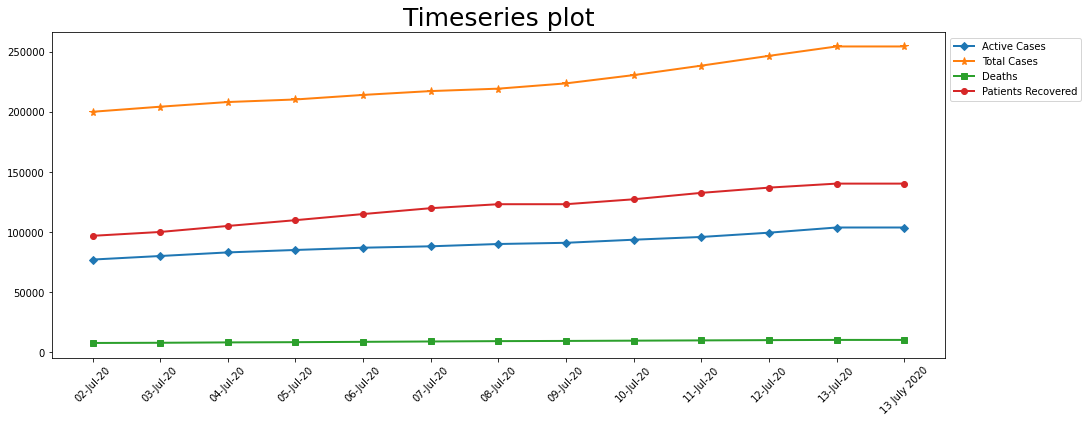

In [10]:
df_maha = df_states[df_states.States == "Maharashtra"]
df_guj = df_states[df_states.States == "Gujarat"]
df_particular_maha = df_maha.drop_duplicates()
df_particular_guj = df_guj.drop_duplicates()
death_count = df_particular_maha["Deaths"].tolist()
total_count = df_particular_maha["Total_count"].tolist()
recoveries_count = df_particular_maha["Recovered"].tolist()
active_count = df_particular_maha["Active"].tolist()
total_guj = df_particular_guj["Total_count"].tolist()
dates = df_particular_maha["Date"].tolist()
plt.plot(dates,active_count,label = "Active Cases", linewidth = "2", marker = "D", markersize = "6")
plt.plot(dates,total_count,label = "Total Cases", linewidth = "2",marker = "*", markersize = "8")
plt.plot(dates,death_count,label = "Deaths", linewidth = "2", marker = "s", markersize = "6")
plt.plot(dates,recoveries_count,label = "Patients Recovered", linewidth = "2", marker = "o", markersize = "6")
plt.xticks(rotation=45)
plt.legend(loc = "center left",bbox_to_anchor=(1, 0.885))
#plt.figure(figsize=(15,15))
fig = plt.gcf()
plt.title("Timeseries plot",fontdict={'fontsize': '25', 'fontweight' : '3'})
fig.set_size_inches(16,6)

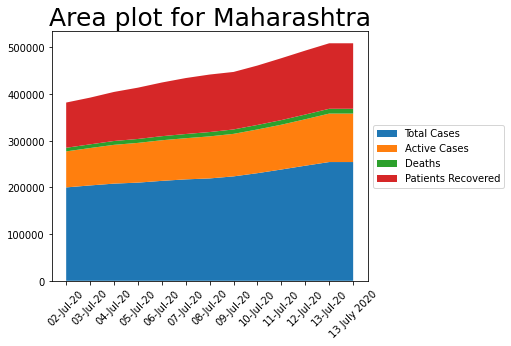

In [11]:
plt.stackplot(dates,total_count,active_count,death_count,recoveries_count,labels=["Total Cases","Active Cases","Deaths","Patients Recovered"])
plt.legend(loc = "center left",bbox_to_anchor=(1,0.5)) 
plt.tight_layout(rect=[0,0,1.2,1])
plt.xticks(rotation=45)
plt.title("Area plot for Maharashtra",fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.show()